<a href="https://colab.research.google.com/github/akshat-020/Stock-Prediction/blob/main/stock_prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Installing the Libraries**

In [2]:
!pip install yahoo_fin
!pip install alpha_vantage
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.4 MB/s 
     |████████████████████████████████| 83 kB 838 kB/s 
     |████████████████████████████████| 112 kB 8.0 MB/s 
     |████████████████████████████████| 127 kB 41.2 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=1f35026676d5584b4f41b8b27a8834b7af2d4cdf33562ce784618a5871738eec
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=6b524cf48183a5df6b375338ffce8fcd0385fc197780c6318df342df7f7d2237
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=6b50d7556755e995399f180954a47924bb6c0fdae181ad3ac350b8

### **Import **

In [3]:
import requests
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot


### **Part 1**

In [4]:
# Import relevant packages
import yahoo_fin.stock_info as ya
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests 
import numpy as np
# Get the 100 most traded stocks for the trading day
movers = ya.get_day_most_active()
movers.head()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,F,Ford Motor Company,15.34,0.65,4.42,107358000.0,61217000.0,61670000000.0,5.08
1,AMD,"Advanced Micro Devices, Inc.",96.78,2.31,2.45,96477000.0,105812000.0,156833000000.0,35.07
2,AMZN,"Amazon.com, Inc.",135.39,0.44,0.33,75596000.0,85351000.0,1.379T,59.12
3,AAPL,Apple Inc.,161.51,-1.00,-0.62,67829000.0,89379000.0,2.596T,26.70
4,CCL,Carnival Corporation & plc,8.92,-0.14,-1.55,54135000.0,53024000.0,11441000000.0,NaN


In [5]:
len(movers)

100

### **Part 2**

### **IBM Stock Data**

In [6]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data_IBM = pdr.get_data_yahoo("IBM", start="2008-01-01", end="2022-04-30")

[*********************100%***********************]  1 of 1 completed


In [7]:
len(data_IBM)

3608

In [8]:
data_IBM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,104.196938,104.196938,99.588913,100.086044,63.457760,9940661
2008-01-03,100.219887,100.927345,99.407265,100.286804,63.585060,7875229
2008-01-04,99.378586,99.378586,96.061188,96.682602,61.299866,11542192
2008-01-07,95.841301,96.558319,94.674950,95.650093,60.645229,13232318
2008-01-08,95.650093,95.965584,92.896751,93.298279,59.154114,9868382


###**Technical Indicators**

### **RSI-INDICATOR**


In [9]:
url = 'https://www.alphavantage.co/query?function=RSI&symbol=IBM&interval=daily&time_period=14&series_type=open&apikey=V23MOD5YM3ZNW9OR'
r = requests.get(url)
rsi_data = r.json()

#print(rsi_data)
new_rsi= pd.DataFrame.from_dict(rsi_data['Technical Analysis: RSI'])
new1_rsi=new_rsi.transpose()
new1_rsi=new1_rsi.iloc[::-1].loc["2008-01-01":"2022-04-30", :]
new1_rsi.head()

,RSI
2008-01-02,51.6058
2008-01-03,39.0469
2008-01-04,38.0455
2008-01-07,31.2910
2008-01-08,30.7916


### **SMA- Simple moving average**




In [10]:
url = 'https://www.alphavantage.co/query?function=SMA&symbol=IBM&interval=daily&time_period=14&series_type=open&apikey=V23MOD5YM3ZNW9OR'
r = requests.get(url)
sma_data = r.json()

#print(sma_data)
new_sma= pd.DataFrame.from_dict(sma_data['Technical Analysis: SMA'])
new1_sma=new_sma.transpose()
new1_sma=new1_sma.iloc[::-1].loc["2008-01-01":"2022-04-30", :]
new1_sma.head()

,SMA
2008-01-02,65.7894
2008-01-03,65.5930
2008-01-04,65.4178
2008-01-07,65.1170
2008-01-08,64.8869


### **EMA-exponential moving average**

In [11]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=EMA&symbol=IBM&interval=daily&time_period=10&series_type=open&apikey=V23MOD5YM3ZNW9OR'
r = requests.get(url)
ema_data = r.json()

#print(ema_data)
#print(ema_data['Technical Analysis: EMA'])

new_ema= pd.DataFrame.from_dict(ema_data['Technical Analysis: EMA'])
new1_ema=new_ema.transpose()
new1_ema=new1_ema.iloc[::-1].loc["2008-01-01":"2022-04-30", :]
print(new1_ema)

                 EMA
2008-01-02   66.1968
2008-01-03   65.6571
2008-01-04   65.1649
2008-01-07   64.3664
2008-01-08   63.6795
...              ...
2022-04-25  131.5984
2022-04-26  132.6377
2022-04-27  132.9097
2022-04-28  133.3245
2022-04-29  133.3549

[3608 rows x 1 columns]


### **ADX-Average Directional Moving Index**

In [12]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=ADX&symbol=IBM&interval=daily&time_period=14&apikey=V23MOD5YM3ZNW9OR'
r = requests.get(url)
adx_data = r.json()

#print(adx_data)
#print(adx_data['Technical Analysis: ADX'])

new_adx= pd.DataFrame.from_dict(adx_data['Technical Analysis: ADX'])
new1_adx=new_adx.transpose()
new1_adx=new1_adx.iloc[::-1].loc["2008-01-01":"2022-04-30", :]
print(new1_adx)


                ADX
2008-01-02  17.4261
2008-01-03  18.2872
2008-01-04  20.0685
2008-01-07  22.0469
2008-01-08  24.2552
...             ...
2022-04-25  21.9355
2022-04-26  23.2305
2022-04-27  23.7500
2022-04-28  24.2323
2022-04-29  23.5034

[3608 rows x 1 columns]


### **OBV-On balance volum**

In [13]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=OBV&symbol=IBM&interval=daily&apikey=V23MOD5YM3ZNW9OR'
r = requests.get(url)
obv_data = r.json()

#print(obv_data)
new_obv= pd.DataFrame.from_dict(obv_data['Technical Analysis: OBV'])
new1_obv=new_obv.transpose()
new1_obv=new1_obv.iloc[::-1].loc["2008-01-01":"2022-04-30", :]
new1_obv.index.rename('Date', inplace=True)
print(new1_obv)

                       OBV
Date                      
2008-01-02   49481456.0000
2008-01-03   57356685.0000
2008-01-04   45814494.0000
2008-01-07   32582176.0000
2008-01-08   22713794.0000
...                    ...
2022-04-25  298547082.0000
2022-04-26  293659687.0000
2022-04-27  289290635.0000
2022-04-28  293767703.0000
2022-04-29  288689043.0000

[3608 rows x 1 columns]


### **Merging the stock data and indicators**

In [14]:
data_IBM = data_IBM.assign(RSI = list(new1_rsi['RSI']))
data_IBM = data_IBM.assign(EMA = list(new1_ema['EMA']))
data_IBM = data_IBM.assign(ADX = list(new1_adx['ADX']))
data_IBM = data_IBM.assign(OBV = list(new1_obv['OBV']))
data_IBM = data_IBM.assign(SMA = list(new1_sma['SMA']))

In [15]:
data_IBM

,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,ADX,OBV,SMA
Date,,,,,,,,,,,
2008-01-02,104.196938,104.196938,99.588913,100.086044,63.457760,9940661,51.6058,66.1968,17.4261,49481456.0000,65.7894
2008-01-03,100.219887,100.927345,99.407265,100.286804,63.585060,7875229,39.0469,65.6571,18.2872,57356685.0000,65.5930
2008-01-04,99.378586,99.378586,96.061188,96.682602,61.299866,11542192,38.0455,65.1649,20.0685,45814494.0000,65.4178
2008-01-07,95.841301,96.558319,94.674950,95.650093,60.645229,13232318,31.2910,64.3664,22.0469,32582176.0000,65.1170
2008-01-08,95.650093,95.965584,92.896751,93.298279,59.154114,9868382,30.7916,63.6795,24.2552,22713794.0000,64.8869
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,137.589996,139.649994,135.190002,139.100006,137.432861,5748300,64.8555,131.5984,21.9355,298547082.0000,128.8931
2022-04-26,139.000000,139.869995,136.169998,136.190002,134.557739,4956200,66.8134,132.6377,23.2305,293659687.0000,129.5387
2022-04-27,135.779999,137.119995,134.630005,135.059998,133.441284,4369100,58.7621,132.9097,23.7500,289290635.0000,130.1032


### **Creating new Features Differential**

In [16]:
data_IBM = data_IBM.assign(Open_Close = list(-data_IBM['Close']+data_IBM.loc["2008-01-01":"2022-04-30", 'Open']))
data_IBM = data_IBM.assign(High_low = list(data_IBM['High']-data_IBM['Low']))


In [17]:
data_IBM


,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,ADX,OBV,SMA,Open_Close,High_low
Date,,,,,,,,,,,,,
2008-01-02,104.196938,104.196938,99.588913,100.086044,63.457760,9940661,51.6058,66.1968,17.4261,49481456.0000,65.7894,4.110893,4.608025
2008-01-03,100.219887,100.927345,99.407265,100.286804,63.585060,7875229,39.0469,65.6571,18.2872,57356685.0000,65.5930,-0.066917,1.520081
2008-01-04,99.378586,99.378586,96.061188,96.682602,61.299866,11542192,38.0455,65.1649,20.0685,45814494.0000,65.4178,2.695984,3.317398
2008-01-07,95.841301,96.558319,94.674950,95.650093,60.645229,13232318,31.2910,64.3664,22.0469,32582176.0000,65.1170,0.191208,1.883369
2008-01-08,95.650093,95.965584,92.896751,93.298279,59.154114,9868382,30.7916,63.6795,24.2552,22713794.0000,64.8869,2.351814,3.068832
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,137.589996,139.649994,135.190002,139.100006,137.432861,5748300,64.8555,131.5984,21.9355,298547082.0000,128.8931,-1.510010,4.459991
2022-04-26,139.000000,139.869995,136.169998,136.190002,134.557739,4956200,66.8134,132.6377,23.2305,293659687.0000,129.5387,2.809998,3.699997
2022-04-27,135.779999,137.119995,134.630005,135.059998,133.441284,4369100,58.7621,132.9097,23.7500,289290635.0000,130.1032,0.720001,2.489990


In [18]:
#data_IBM.at['2008-01-03']['Close']=100.286804

In [19]:
data_IBM

,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,ADX,OBV,SMA,Open_Close,High_low
Date,,,,,,,,,,,,,
2008-01-02,104.196938,104.196938,99.588913,100.086044,63.457760,9940661,51.6058,66.1968,17.4261,49481456.0000,65.7894,4.110893,4.608025
2008-01-03,100.219887,100.927345,99.407265,100.286804,63.585060,7875229,39.0469,65.6571,18.2872,57356685.0000,65.5930,-0.066917,1.520081
2008-01-04,99.378586,99.378586,96.061188,96.682602,61.299866,11542192,38.0455,65.1649,20.0685,45814494.0000,65.4178,2.695984,3.317398
2008-01-07,95.841301,96.558319,94.674950,95.650093,60.645229,13232318,31.2910,64.3664,22.0469,32582176.0000,65.1170,0.191208,1.883369
2008-01-08,95.650093,95.965584,92.896751,93.298279,59.154114,9868382,30.7916,63.6795,24.2552,22713794.0000,64.8869,2.351814,3.068832
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,137.589996,139.649994,135.190002,139.100006,137.432861,5748300,64.8555,131.5984,21.9355,298547082.0000,128.8931,-1.510010,4.459991
2022-04-26,139.000000,139.869995,136.169998,136.190002,134.557739,4956200,66.8134,132.6377,23.2305,293659687.0000,129.5387,2.809998,3.699997
2022-04-27,135.779999,137.119995,134.630005,135.059998,133.441284,4369100,58.7621,132.9097,23.7500,289290635.0000,130.1032,0.720001,2.489990


In [20]:
data_IBM['dif_open'] = data_IBM['Open'].diff(1)
data_IBM['dif_close']=data_IBM['Close'].diff(1)
data_IBM['dif_vol'] = data_IBM['Volume'].diff(1)
data_IBM['dif_high']=data_IBM['High'].diff(1)
data_IBM['dif_low'] = data_IBM['Low'].diff(1)
data_IBM['dif_adj_close']=data_IBM['Adj Close'].diff(1)
data_IBM['Real_lower_band']=data_IBM['Close'] - (0.1 * data_IBM['Close'])
data_IBM['Real_upper_band']=data_IBM['Close'] + (0.1 * data_IBM['Close'])

In [21]:
data_IBM=data_IBM.dropna()
data_IBM

,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,ADX,OBV,...,Open_Close,High_low,dif_open,dif_close,dif_vol,dif_high,dif_low,dif_adj_close,Real_lower_band,Real_upper_band
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-03,100.219887,100.927345,99.407265,100.286804,63.585060,7875229,39.0469,65.6571,18.2872,57356685.0000,...,-0.066917,1.520081,-3.977051,0.200760,-2065432.0,-3.269592,-0.181648,0.127300,90.258124,110.315485
2008-01-04,99.378586,99.378586,96.061188,96.682602,61.299866,11542192,38.0455,65.1649,20.0685,45814494.0000,...,2.695984,3.317398,-0.841301,-3.604202,3666963.0,-1.548759,-3.346077,-2.285194,87.014342,106.350862
2008-01-07,95.841301,96.558319,94.674950,95.650093,60.645229,13232318,31.2910,64.3664,22.0469,32582176.0000,...,0.191208,1.883369,-3.537285,-1.032509,1690126.0,-2.820267,-1.386238,-0.654636,86.085084,105.215102
2008-01-08,95.650093,95.965584,92.896751,93.298279,59.154114,9868382,30.7916,63.6795,24.2552,22713794.0000,...,2.351814,3.068832,-0.191208,-2.351814,-3363936.0,-0.592735,-1.778198,-1.491116,83.968451,102.628107
2008-01-09,93.460800,94.789673,92.887192,93.986618,59.590530,11424517,27.7145,62.9005,26.3078,34138310.0000,...,-0.525818,1.902481,-2.189293,0.688339,1556135.0,-1.175911,-0.009560,0.436417,84.587956,103.385280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,137.589996,139.649994,135.190002,139.100006,137.432861,5748300,64.8555,131.5984,21.9355,298547082.0000,...,-1.510010,4.459991,-2.110001,0.850006,-760300.0,-0.790009,-2.160004,0.839813,125.190005,153.010007
2022-04-26,139.000000,139.869995,136.169998,136.190002,134.557739,4956200,66.8134,132.6377,23.2305,293659687.0000,...,2.809998,3.699997,1.410004,-2.910004,-792100.0,0.220001,0.979996,-2.875122,122.571002,149.809003
2022-04-27,135.779999,137.119995,134.630005,135.059998,133.441284,4369100,58.7621,132.9097,23.7500,289290635.0000,...,0.720001,2.489990,-3.220001,-1.130005,-587100.0,-2.750000,-1.539993,-1.116455,121.553998,148.565997


In [22]:
data_IBM

,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,ADX,OBV,...,Open_Close,High_low,dif_open,dif_close,dif_vol,dif_high,dif_low,dif_adj_close,Real_lower_band,Real_upper_band
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-03,100.219887,100.927345,99.407265,100.286804,63.585060,7875229,39.0469,65.6571,18.2872,57356685.0000,...,-0.066917,1.520081,-3.977051,0.200760,-2065432.0,-3.269592,-0.181648,0.127300,90.258124,110.315485
2008-01-04,99.378586,99.378586,96.061188,96.682602,61.299866,11542192,38.0455,65.1649,20.0685,45814494.0000,...,2.695984,3.317398,-0.841301,-3.604202,3666963.0,-1.548759,-3.346077,-2.285194,87.014342,106.350862
2008-01-07,95.841301,96.558319,94.674950,95.650093,60.645229,13232318,31.2910,64.3664,22.0469,32582176.0000,...,0.191208,1.883369,-3.537285,-1.032509,1690126.0,-2.820267,-1.386238,-0.654636,86.085084,105.215102
2008-01-08,95.650093,95.965584,92.896751,93.298279,59.154114,9868382,30.7916,63.6795,24.2552,22713794.0000,...,2.351814,3.068832,-0.191208,-2.351814,-3363936.0,-0.592735,-1.778198,-1.491116,83.968451,102.628107
2008-01-09,93.460800,94.789673,92.887192,93.986618,59.590530,11424517,27.7145,62.9005,26.3078,34138310.0000,...,-0.525818,1.902481,-2.189293,0.688339,1556135.0,-1.175911,-0.009560,0.436417,84.587956,103.385280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,137.589996,139.649994,135.190002,139.100006,137.432861,5748300,64.8555,131.5984,21.9355,298547082.0000,...,-1.510010,4.459991,-2.110001,0.850006,-760300.0,-0.790009,-2.160004,0.839813,125.190005,153.010007
2022-04-26,139.000000,139.869995,136.169998,136.190002,134.557739,4956200,66.8134,132.6377,23.2305,293659687.0000,...,2.809998,3.699997,1.410004,-2.910004,-792100.0,0.220001,0.979996,-2.875122,122.571002,149.809003
2022-04-27,135.779999,137.119995,134.630005,135.059998,133.441284,4369100,58.7621,132.9097,23.7500,289290635.0000,...,0.720001,2.489990,-3.220001,-1.130005,-587100.0,-2.750000,-1.539993,-1.116455,121.553998,148.565997


In [23]:
data_IBM=data_IBM.reset_index()

In [24]:
data_IBM=data_IBM.drop(['Date'],axis=1)

In [25]:
data_IBM

,Open,High,Low,Close,Adj Close,Volume,RSI,EMA,ADX,OBV,...,Open_Close,High_low,dif_open,dif_close,dif_vol,dif_high,dif_low,dif_adj_close,Real_lower_band,Real_upper_band
0,100.219887,100.927345,99.407265,100.286804,63.585060,7875229,39.0469,65.6571,18.2872,57356685.0000,...,-0.066917,1.520081,-3.977051,0.200760,-2065432.0,-3.269592,-0.181648,0.127300,90.258124,110.315485
1,99.378586,99.378586,96.061188,96.682602,61.299866,11542192,38.0455,65.1649,20.0685,45814494.0000,...,2.695984,3.317398,-0.841301,-3.604202,3666963.0,-1.548759,-3.346077,-2.285194,87.014342,106.350862
2,95.841301,96.558319,94.674950,95.650093,60.645229,13232318,31.2910,64.3664,22.0469,32582176.0000,...,0.191208,1.883369,-3.537285,-1.032509,1690126.0,-2.820267,-1.386238,-0.654636,86.085084,105.215102
3,95.650093,95.965584,92.896751,93.298279,59.154114,9868382,30.7916,63.6795,24.2552,22713794.0000,...,2.351814,3.068832,-0.191208,-2.351814,-3363936.0,-0.592735,-1.778198,-1.491116,83.968451,102.628107
4,93.460800,94.789673,92.887192,93.986618,59.590530,11424517,27.7145,62.9005,26.3078,34138310.0000,...,-0.525818,1.902481,-2.189293,0.688339,1556135.0,-1.175911,-0.009560,0.436417,84.587956,103.385280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,137.589996,139.649994,135.190002,139.100006,137.432861,5748300,64.8555,131.5984,21.9355,298547082.0000,...,-1.510010,4.459991,-2.110001,0.850006,-760300.0,-0.790009,-2.160004,0.839813,125.190005,153.010007
3603,139.000000,139.869995,136.169998,136.190002,134.557739,4956200,66.8134,132.6377,23.2305,293659687.0000,...,2.809998,3.699997,1.410004,-2.910004,-792100.0,0.220001,0.979996,-2.875122,122.571002,149.809003
3604,135.779999,137.119995,134.630005,135.059998,133.441284,4369100,58.7621,132.9097,23.7500,289290635.0000,...,0.720001,2.489990,-3.220001,-1.130005,-587100.0,-2.750000,-1.539993,-1.116455,121.553998,148.565997
3605,136.850006,136.990005,134.809998,135.740005,134.113144,4474300,60.4669,133.3245,24.2323,293767703.0000,...,1.110001,2.180008,1.070007,0.680008,105200.0,-0.129990,0.179993,0.671860,122.166005,149.314006


### **Exploratory Data Analysis and Feature engineering**

In [26]:
data_IBM.corr()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_low,dif_open,dif_close,dif_vol,dif_high,dif_low,dif_adj_close,Real_lower_band,Real_upper_band
Open,1.000000,0.999327,0.999325,0.998603,0.805251,-0.408480,0.031571,-0.101140,0.030016,-0.009851,0.003251,0.010280,0.008847,-0.009759,0.998603,0.998603
High,0.999327,1.000000,0.999107,0.999325,0.804296,-0.397690,0.005163,-0.080179,0.028695,0.008905,0.007951,0.027237,0.017972,0.008740,0.999325,0.999325
Low,0.999325,0.999107,1.000000,0.999319,0.806136,-0.418995,0.005246,-0.122227,0.033353,0.011121,-0.001576,0.024161,0.028266,0.010990,0.999319,0.999319
Close,0.998603,0.999325,0.999319,1.000000,0.805146,-0.408265,-0.021294,-0.101037,0.031665,0.031284,0.002834,0.034632,0.031368,0.030808,1.000000,1.000000
Adj Close,0.805251,0.804296,0.806136,0.805146,1.000000,-0.500989,0.006114,-0.124829,0.026943,0.025903,0.003044,0.029459,0.025899,0.029680,0.805146,0.805146
Volume,-0.408480,-0.397690,-0.418995,-0.408265,-0.500989,1.000000,-0.006160,0.542831,-0.104331,-0.093543,0.419181,-0.041516,-0.168134,-0.099539,-0.408265,-0.408265
Open_Close,0.031571,0.005163,0.005246,-0.021294,0.006114,-0.006160,1.000000,-0.002460,-0.031039,-0.778031,0.007902,-0.460514,-0.425897,-0.767287,-0.021294,-0.021294
High_low,-0.101140,-0.080179,-0.122227,-0.101037,-0.124829,0.542831,-0.002460,1.000000,-0.112775,-0.053173,0.223943,0.069800,-0.244645,-0.053973,-0.101037,-0.101037
dif_open,0.030016,0.028695,0.033353,0.031665,0.026943,-0.104331,-0.031039,-0.112775,1.000000,0.415887,-0.085482,0.730684,0.763791,0.412161,0.031665,0.031665
dif_close,-0.009851,0.008905,0.011121,0.031284,0.025903,-0.093543,-0.778031,-0.053173,0.415887,1.000000,-0.081442,0.756338,0.739770,0.988624,0.031284,0.031284


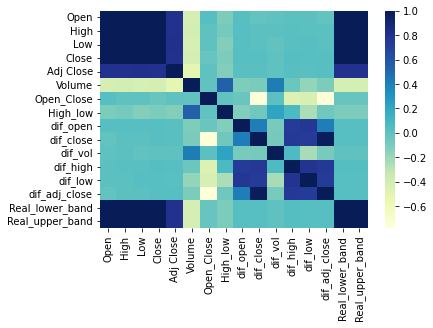

In [27]:
dataplot = sns.heatmap(data_IBM.corr(), cmap="YlGnBu",)

### **Mutual information gain**

In [28]:
X=data_IBM.drop(columns= ['Close','Adj Close'])
y=data_IBM['Close']
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:

from sklearn.feature_selection import mutual_info_regression, SelectKBest

mi = mutual_info_regression(X_train,y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False,inplace=True)
mi

Real_upper_band    6.665853
Real_lower_band    6.665310
Low                3.501298
High               3.499008
Open               2.918327
EMA                1.313016
SMA                1.226737
OBV                1.048275
ADX                0.238745
Volume             0.215614
RSI                0.117842
High_low           0.053130
dif_open           0.031683
dif_close          0.026276
Open_Close         0.020012
dif_adj_close      0.012204
dif_low            0.012131
dif_vol            0.007557
dif_high           0.000000
dtype: float64


Selecting features with contributions greater than 1.2. Dropping other features

Real_upper_band    
Real_lower_band    
Low                
High               
Open               
EMA                
SMA                
OBV                

In [30]:
X.columns

Index(['Open', 'High', 'Low', 'Volume', 'RSI', 'EMA', 'ADX', 'OBV', 'SMA',
       'Open_Close', 'High_low', 'dif_open', 'dif_close', 'dif_vol',
       'dif_high', 'dif_low', 'dif_adj_close', 'Real_lower_band',
       'Real_upper_band'],
      dtype='object')

In [31]:
X.drop(columns=['Volume', 'RSI','ADX','Open_Close', 'High_low', 'dif_open', 'dif_close', 'dif_vol','dif_high', 'dif_low', 'dif_adj_close'])

,Open,High,Low,EMA,OBV,SMA,Real_lower_band,Real_upper_band
0,100.219887,100.927345,99.407265,65.6571,57356685.0000,65.5930,90.258124,110.315485
1,99.378586,99.378586,96.061188,65.1649,45814494.0000,65.4178,87.014342,106.350862
2,95.841301,96.558319,94.674950,64.3664,32582176.0000,65.1170,86.085084,105.215102
3,95.650093,95.965584,92.896751,63.6795,22713794.0000,64.8869,83.968451,102.628107
4,93.460800,94.789673,92.887192,62.9005,34138310.0000,64.6135,84.587956,103.385280
...,...,...,...,...,...,...,...,...
3602,137.589996,139.649994,135.190002,131.5984,298547082.0000,128.8931,125.190005,153.010007
3603,139.000000,139.869995,136.169998,132.6377,293659687.0000,129.5387,122.571002,149.809003
3604,135.779999,137.119995,134.630005,132.9097,289290635.0000,130.1032,121.553998,148.565997
3605,136.850006,136.990005,134.809998,133.3245,293767703.0000,130.6663,122.166005,149.314006


### **LSTM**

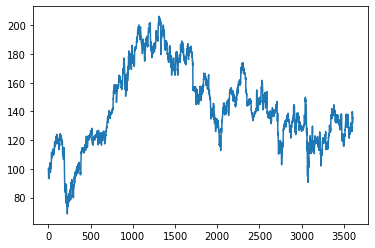

In [32]:
data_IBM['Close'].plot()

### **Creating the dataset for LSTM**

In [33]:
def custom_ts_multi_data_prep(data_IBM, target,window, horizon,start,end):
     X = []
     y = []
     start = start + int(window)
     if end is None:
         end = len(data_IBM) - horizon
     for i in range(start, end):
         indices = range(i-window, i)
         X.append(data_IBM.iloc[indices])
         indicey = range(i+1, i+1+horizon)
         y.append(target.iloc[indicey])
     return np.array(X), np.array(y)



In [34]:
X_data=data_IBM[['Real_upper_band','Real_lower_band','Low','High','Open','EMA','SMA','OBV']]
Y_data=data_IBM[['Close']]

In [61]:
hist_window = 100
horizon = 10
TRAIN_SPLIT=int(0.8*len(data_IBM))
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data,hist_window, horizon,0, TRAIN_SPLIT )
x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data,hist_window, horizon,TRAIN_SPLIT,None) 

In [62]:
x_train=np.asarray(x_train).astype(np.float)
y_train=np.asarray(y_train).astype(np.float)
x_vali=np.asarray(x_vali).astype(np.float)
y_vali=np.asarray(y_vali).astype(np.float)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: Depreca

In [64]:
x_train.shape

(2785, 100, 8)

In [63]:
y_train.shape

(2785, 10, 1)

In [65]:
x_vali.shape

(612, 100, 8)

In [66]:
y_vali.shape

(612, 10, 1)

In [67]:

type(x_train)

numpy.ndarray

In [68]:
from tensorflow import keras
import tensorflow as tf

In [69]:
train_x=tf.convert_to_tensor(x_train)
train_y=tf.convert_to_tensor(y_train)
vali_x=tf.convert_to_tensor(x_vali)
vali_y=tf.convert_to_tensor(y_vali)

In [70]:
batch_size = 64

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().batch(batch_size).repeat()
val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat() 

### **Building the Model**

In [71]:

# Build model. Include 20% drop out to minimize overfitting
model = keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(50,return_sequences=True,input_shape=(x_train.shape[1], x_train.shape[2]))))

In [72]:

model.add(keras.layers.LSTM(50,return_sequences=True))
model.add(keras.layers.LSTM(50))
model.add(keras.layers.Dense(1))
# Define optimizer and metric for loss function
model.compile(optimizer='adam',loss='mean_squared_error')


# Run model
history = model.fit(
    train_x, train_y, 
    epochs=100, 
    batch_size=64, 
    validation_split=0.2,
    shuffle=False,
    verbose=1
)

Epoch 1/100
35/35 [==============================] - 20s 307ms/step - loss: 22343.0020 - val_loss: 16901.3926
Epoch 2/100
35/35 [==============================] - 10s 282ms/step - loss: 20798.2441 - val_loss: 16077.8115
Epoch 3/100
35/35 [==============================] - 9s 250ms/step - loss: 20124.8047 - val_loss: 15557.1221
Epoch 4/100
35/35 [==============================] - 9s 250ms/step - loss: 19578.4219 - val_loss: 15082.0449
Epoch 5/100
35/35 [==============================] - 9s 253ms/step - loss: 19067.1035 - val_loss: 14631.7158
Epoch 6/100
35/35 [==============================] - 9s 249ms/step - loss: 18577.9883 - val_loss: 14199.2109
Epoch 7/100
35/35 [==============================] - 9s 254ms/step - loss: 18105.8340 - val_loss: 13781.1680
Epoch 8/100
35/35 [==============================] - 9s 254ms/step - loss: 17647.8574 - val_loss: 13375.6514
Epoch 9/100
35/35 [==============================] - 9s 251ms/step - loss: 17202.3867 - val_loss: 12981.4219
Epoch 10/100
35/3

In [73]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 100, 100)         23600     
 nal)                                                            
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           30200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 74,051
Trainable params: 74,051
Non-trainable params: 0
_________________________________________________________________


In [74]:
train_predict=model.predict(train_x)
test_predict=model.predict(vali_x)

In [80]:
vali_y.shape

TensorShape([612, 10, 1])

## Calculation of *errors* 

In [89]:
import math
from sklearn.metrics import mean_squared_error
err=0
for i in range(horizon):
  err=err+(math.sqrt(mean_squared_error(test_predict[:,i,:],vali_y[:,i,:])))**2
err=math.sqrt(err)


IndexError: ignored

In [55]:
math.sqrt(mean_squared_error(test_predict,vali_y[:,:,0]))

11.494256089717716

### **Plotting the prediction**